In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from scipy import stats

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [4]:
df = pd.read_csv("downloads/reg_data_1(3).csv")

df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
5,15.0,8,429.0,198,4341,10.0,70


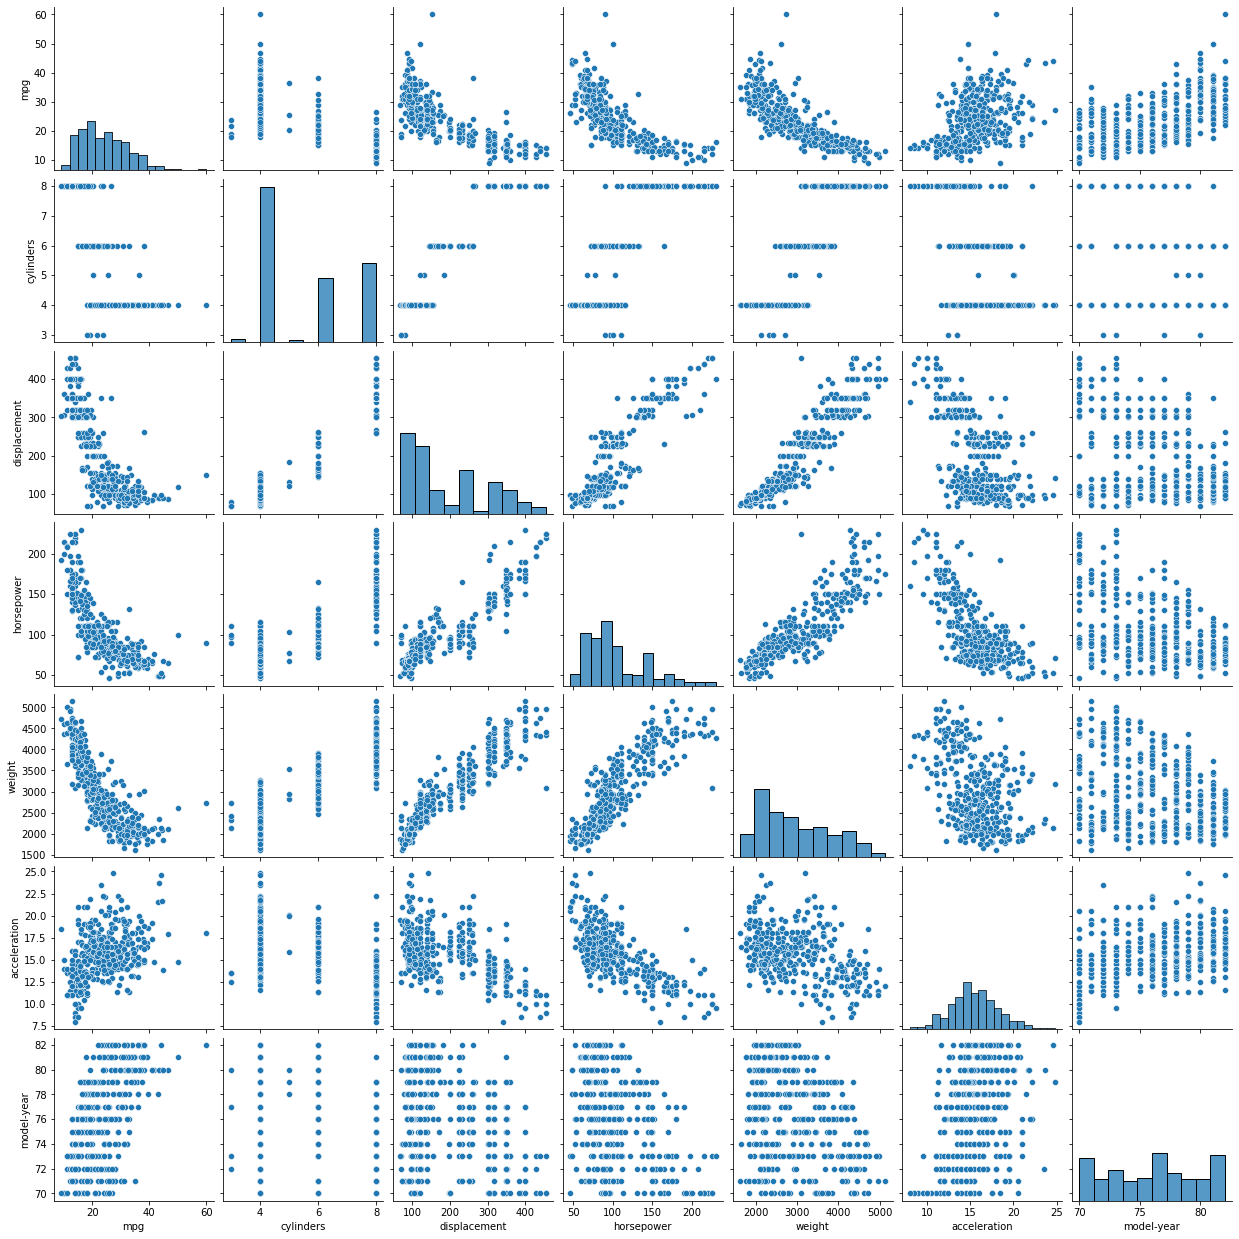

In [5]:
sb.pairplot(df)

In [6]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
mpg,1.000000,-0.759922,-0.782530,-0.752790,-0.806627,0.413004,0.583087
cylinders,-0.759922,1.000000,0.950706,0.843751,0.896058,-0.504844,-0.352554
displacement,-0.782530,0.950706,1.000000,0.897787,0.932729,-0.542713,-0.374620
horsepower,-0.752790,0.843751,0.897787,1.000000,0.864350,-0.687241,-0.420697
weight,-0.806627,0.896058,0.932729,0.864350,1.000000,-0.415462,-0.311774
acceleration,0.413004,-0.504844,-0.542713,-0.687241,-0.415462,1.000000,0.294588
model-year,0.583087,-0.352554,-0.374620,-0.420697,-0.311774,0.294588,1.000000


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
dtype: int64

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,23.643687,5.457071,193.650253,104.189394,2973.000000,15.555808,76.027778
std,8.139585,1.703511,104.422387,38.402030,847.690354,2.758295,3.696969
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.375000,4.000000,104.750000,75.000000,2225.250000,13.800000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,263.250000,125.000000,3610.000000,17.125000,79.000000
max,60.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x21b24affee0>,
 'caps': [<matplotlib.lines.Line2D at 0x21b24b0d5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b24affb80>],
 'medians': [<matplotlib.lines.Line2D at 0x21b24b0dca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b24b18040>],
 'means': []}

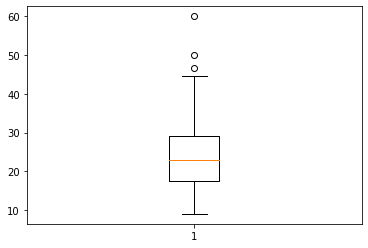

In [6]:
mpg_box = df[['mpg']]
plt.boxplot(mpg_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x21b24b6a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21b24b6a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b24b5bd30>],
 'medians': [<matplotlib.lines.Line2D at 0x21b24b6ae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b24b761f0>],
 'means': []}

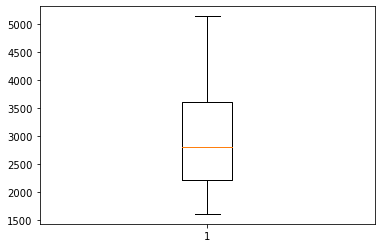

In [7]:
weight_box = df[['weight']]
plt.boxplot(weight_box)

In [8]:
mpg = mpg_box[(np.abs(stats.zscore(mpg_box)) < 3)]
mpg

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
391,27.0
392,44.0
393,32.0
394,28.0


In [9]:
weight = weight_box[(np.abs(stats.zscore(weight_box)) < 3)]
weight

,weight
0,3504
1,3693
2,3436
3,3433
4,3449
...,...
391,2790
392,2130
393,2295
394,2625


In [10]:
horsepower = df[['horsepower']]

In [11]:
real_df =  pd.concat([mpg,weight, horsepower], axis=1, verify_integrity=True).astype(float)
real_df

,mpg,weight,horsepower
0,18.0,3504.0,130.0
1,15.0,3693.0,165.0
2,18.0,3436.0,150.0
3,16.0,3433.0,150.0
4,17.0,3449.0,140.0
...,...,...,...
391,27.0,2790.0,86.0
392,44.0,2130.0,52.0
393,32.0,2295.0,84.0
394,28.0,2625.0,79.0


<AxesSubplot:>

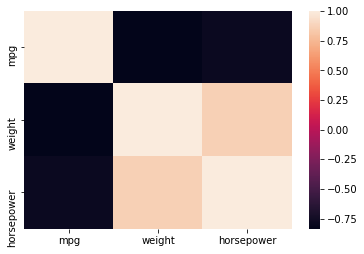

In [11]:
sb.heatmap(real_df.corr())

In [12]:
X_train, X_test, y_train, y_test = train_test_split(real_df.drop('mpg', axis=1),
                                                   real_df['mpg'], test_size=0.2,
                                                   random_state=200)

In [28]:
y_train = y_train.dropna()
y_test = y_test.dropna()

X_test = X_test.dropna()
X_test = X_test[:79]
X_train = X_train.dropna()
X_train = X_train[:315]

In [14]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         394 non-null    float64
 1   weight      396 non-null    float64
 2   horsepower  396 non-null    float64
dtypes: float64(3)
memory usage: 12.4 KB


In [15]:
LogReg = linear_model.LinearRegression()
LogReg.fit(X_train, y_train)

LinearRegression()

In [16]:
predicted_mpg = LogReg.predict([[3000,220]])
predicted_mpg

array([17.91033985])

[-0.00043275 -0.003113  ]


ValueError: x and y must be the same size

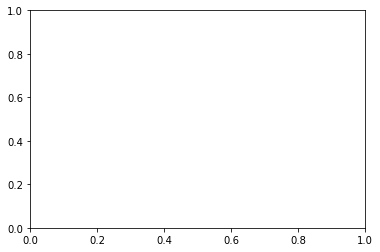

In [29]:
print(LogReg.coef_)

#X_test.info()
#y_test.info()
plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)

,horsepower
0,130
1,165
2,150
3,150
4,140
...,...
391,86
392,52
393,84
394,79


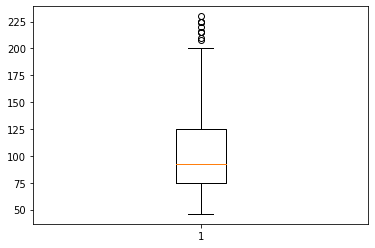

In [21]:
hp_box = df[['horsepower']]
plt.boxplot(hp_box)

horsepower = hp_box[(np.abs(stats.zscore(hp_box)) < 3)]
horsepower

In [22]:
real_df2 =  pd.concat([mpg,weight, horsepower], axis=1, verify_integrity=True).astype(float)
real_df2

,mpg,weight,horsepower
0,18.0,3504.0,130.0
1,15.0,3693.0,165.0
2,18.0,3436.0,150.0
3,16.0,3433.0,150.0
4,17.0,3449.0,140.0
...,...,...,...
391,27.0,2790.0,86.0
392,44.0,2130.0,52.0
393,32.0,2295.0,84.0
394,28.0,2625.0,79.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(real_df2.drop('mpg', axis=1),
                                                   real_df2['mpg'], test_size=0.2,
                                                   random_state=200)
y_train = y_train.dropna()
y_train = y_train[:313]

X_train = X_train.dropna()
X_train = X_train[:315]


LogReg = linear_model.LinearRegression()
LogReg.fit(X_train, y_train)

predicted_mpg = LogReg.predict([[3000,220]])
predicted_mpg

array([22.8314095])